# Name: Adeola Solomon
# Student Number: 500654279
# Department: Advanced Data Science
# Course: Machine Learning


# 1     Introduction
Data set Banknote Authentication is taken from the UCI repository: https://archive.ics.uci.edu/ml/datasets/banknote+authentication . 
Data were extracted from 400-by-400-pixel images that were taken from genuine and forged banknote-like specimens. Wavelet Transform was used to extract features from the images.
The data set has 4 features and a class label as the last column. The labels are 0 and 1 where 0 corresponds to genuine banknote, and 1 corresponds to forgery. 

The data set is comma-delimited and is stored as data_banknote_authentication.txt.

The aim of this assignment is to predict the labels of the first and the last column.

The scope of the work is to import the data, plot the features create a classifier or discriminant function that would be used to predict two of the specified features of interest. 

Having predicted, a confusion matrix would be generated from the predicted labels and true labels, Confusion matrices compare True Positives, False Positives, True Negatives, and False Negatives and metrics like recall, f10, accuracy, and precision would be gotten from the confusion matrix to give performance evaluation of the discriminant function.









### 1.1     Importing the necessary modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### 2   Data Handling and Visualisation

###     1(a) Use the ‘pandas’ library or the ‘numpy’ library to read the data set.

The data set is imported through pandas and the columns are named after converting to a DataFrame

In [2]:
df = pd.read_csv('data_banknote_authentication.txt',header = None)
df = pd.DataFrame( df.values, columns=list('12345') )

output

In [3]:
print(df)

            1         2        3        4    5
0     3.62160   8.66610  -2.8073 -0.44699  0.0
1     4.54590   8.16740  -2.4586 -1.46210  0.0
2     3.86600  -2.63830   1.9242  0.10645  0.0
3     3.45660   9.52280  -4.0112 -3.59440  0.0
4     0.32924  -4.45520   4.5718 -0.98880  0.0
...       ...       ...      ...      ...  ...
1367  0.40614   1.34920  -1.4501 -0.55949  1.0
1368 -1.38870  -4.87730   6.4774  0.34179  1.0
1369 -3.75030 -13.45860  17.5932 -2.77710  1.0
1370 -3.56370  -8.38270  12.3930 -1.28230  1.0
1371 -2.54190  -0.65804   2.6842  1.19520  1.0

[1372 rows x 5 columns]


### 1(b) Subsequently, split the data set into arrays called Data and Labels

The data set is split by grouping the feature columns into Data variables, and the label column into Labels variable as arrays:

In [4]:
Data = df[['1','2','3','4']].values
Labels = df['5'].values
Labels = np.array( Labels )

Output

In [5]:
print(Data)

print(Labels)

[[  3.6216    8.6661   -2.8073   -0.44699]
 [  4.5459    8.1674   -2.4586   -1.4621 ]
 [  3.866    -2.6383    1.9242    0.10645]
 ...
 [ -3.7503  -13.4586   17.5932   -2.7771 ]
 [ -3.5637   -8.3827   12.393    -1.2823 ]
 [ -2.5419   -0.65804   2.6842    1.1952 ]]
[0. 0. 0. ... 1. 1. 1.]


### (1c) Ensure that the labels are encoded as class 1 and 2 (1 for class ‘genuine’ and 2 for class ‘fraudulent’)

By calling out the Labels array and locating where there are 1's and replacing with 2, and the same is done for 0's replacing them with 1

In [6]:
Labels[ np.where( Labels == 1 ) ] = 2

Labels[ np.where( Labels == 0 ) ] = 1

output

In [7]:
print(Labels)

[1. 1. 1. ... 2. 2. 2.]


Output

### 1(d) Evaluate from the data and print the values of c,N and n for this data set

The respective values of c, N and n are gotten from functions such as len, np.unique

In [8]:
print('The dataset contains N objects = ', len(Data),',') 
print('n features =', (len('Data')))
print('and c = ', len(np.unique(Labels)),'classes.')

The dataset contains N objects =  1372 ,
n features = 4
and c =  2 classes.


### 1(e) Prepare scatterplots of the data in the space spanned by every pair of features. 

The range of the plot and features to plot on x, y axis is defined as columns 1, 2, 3, 4, with the labels as c to get Figure 1

In [9]:
data1=np.array(df.columns)[:-1]
c = Labels

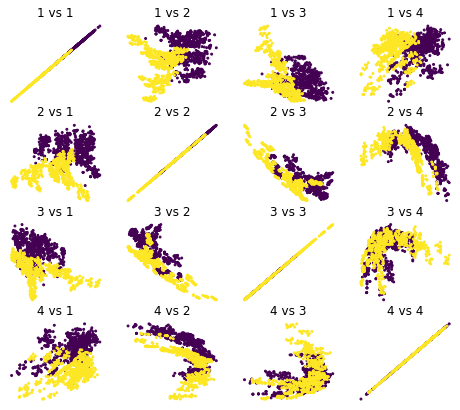

In [10]:
# %matplotlib widget

plt.figure(figsize=(8, 7))

for j in range(len('Data')):
    for i in range(len('Data')):
        plot_index = j * len('Data') + i + 1
        plt.subplot(len('Data'), len('Data'), plot_index)
        plt.scatter(df[data1[j]], df[data1[i]], marker=".", c = c, s = 15)
        
        plt.title( str(j+1)+ ' vs ' + str(i+1) )
        
        plt.axis('off')    
        plt.grid()
 

### 1(f)  Consider a data set, Data2, where only features 1 and 4 are used. Take columns 0 and 3 and all labels to create the new data set. Plot the data on the two features (use plt.plot to show the classes with different markers).

A new variable is created to store the feature arrays of interest: column 1 and 4 named Data2, then Data 2 is split into x and y for plotting against each other. Various editing are done to make the plot such as labelling, fontsizes, xlim and ylim. Importing line 2d from matplotlib allows definition of legends.

In [30]:
Data2 = df[['1','4']].values
Data2
x = Data2[:,0]
y = Data2[:,1]

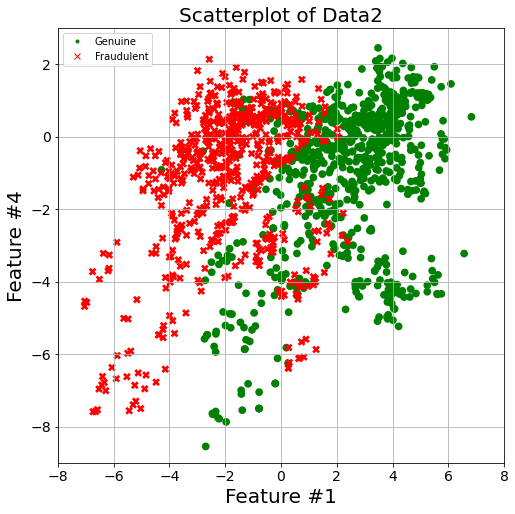

In [33]:
colours = ['green', 'red']
fig, axes = plt.subplots(1, 1, figsize=(8, 8))
sns.scatterplot(data=Data2, x = x, y = y, palette = colours,
                hue = Labels ,style = Labels, s = 60,edgecolor="none",linewidths=1)

plt.xlabel("Feature #1", size=20)
plt.ylabel("Feature #4", size=20)
plt.title('Scatterplot of Data2', size = 20)

plt.xlim(-8,8)
plt.ylim(-9,3)
plt.tick_params(labelsize=14)
from matplotlib.lines import Line2D

custom = [Line2D([], [], marker='.', color='g', linestyle='None'),
          Line2D([], [], marker='x', color='r', linestyle='None')]
plt.legend(custom, ['Genuine','Fraudulent'], loc='upper left')

plt.grid()


# 3 A linear discriminant classifier (LDC)

### (a) Consider the scatterplot of Data2 which you prepared for problem 1 (f). Create by eye a linear classifier that separates the two classes. (Pick two points to define the discriminant function and calculate the equation of the function.)



1. Find the line that separate the two classes,
2. find two points on the line:
    - (-1, -9)
    - (1, 3)
3. Solve for the discrimination function equation:
    
    $$
    \frac{y - y_1}{y_2 - y_1} = \frac{x - x_1}{x_2 - x_1}$$
    
    $$
    y_1 = -9 \\
    y_2 = 3 \\
    x_1 = -1 \\
    x_2 = 1 \\
    $$
    
    $$
    \frac{y + 9}{3 + 9} = \frac{x + 1}{1 + 1}
    $$
    
    $$
    \frac{y + 9}{12} = \frac{x + 1}{2}
    $$
    
    Cross multiply
    
    $$
    12x + 12 = 2y + 18\\
    $$
    
     $$
    -12x + 6 + 2y = 0\\
    $$
    
    Divide through by 2
    
    $$
    -6x + 3 + y = 0\\
    $$

    This gives our discriminant function:
    
    $$
    g = - 3x_1 + x_2 + 3  \\
    $$
    
    

### (b) Plot the function in the figure with the scatteplot. Explain how you determined which class region corresponds to which class.

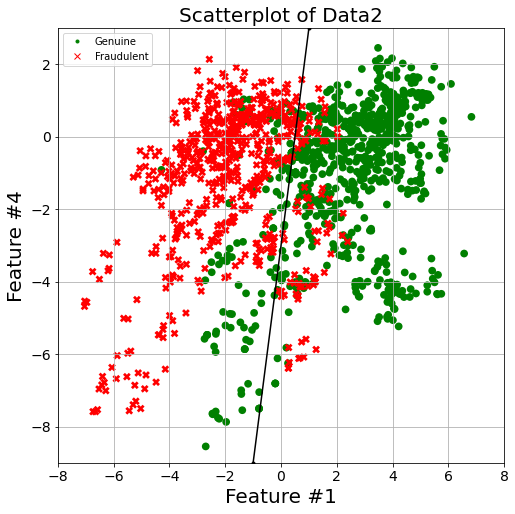

In [13]:
colours = ['green', 'red']
fig, axes = plt.subplots(1, 1, figsize=(8, 8))
sns.scatterplot(data=Data2, x = x, y = y, palette = colours,
                hue = Labels,style = Labels, s = 60,edgecolor="none",linewidths=1)
plt.plot([-1,1], [-9,3], "k.-")
plt.xlabel("Feature #1", size=20)
plt.ylabel("Feature #4", size=20)
plt.title('Scatterplot of Data2', size=20)

plt.xlim(-8,8)
plt.ylim(-9,3)
plt.tick_params(labelsize=14)
from matplotlib.lines import Line2D

custom = [Line2D([], [], marker='.', color='g', linestyle='None'),
          Line2D([], [], marker='x', color='r', linestyle='None')]
plt.legend(custom, ['Genuine','Fraudulent'], loc='upper left')
plt.grid()

######  In the scatterplot above, plt.plot([-1,1], [-9,3], "k.-") is used to show the line that seperates the classes.
######  If the sign of g(x) is negative, the object belongs to a certain class. If the sign is positive, it belongs to the other class.

### (c) Using your discriminant function, create a new array ‘Predictions’ that stores the predicted class labels using Data 2 as your testing set.

The discriminant function g is passed into a defined function g2, the sign of the equation is gotten and changed to integer then prediction is done using the defined function g2 and stored into an empty array predictions

In [14]:
def g2(k1, k2, k3, x1, x2):
    # Discriminant function
    g = k1 * x1 + k2 * x2 + k3
    
   
    # Get the sign
    p = np.sign(g).astype(np.int8)
    
    # Replace -1 with 0
    p[p==-1] = 0
    
    # 0 is for the background (1), 1 is for the foregroung (2)
    p += 1
    
    # Return the prediction
    return p 

In [15]:
x1 = Data2[:,0]
x2 = Data2[:,1]
# create an empty array called Predictions
Predictions = [] 

for c, prediction in zip(Labels.astype(int), g2(-6, 1, 3, x1, x2)):
    Predictions.append([c, prediction])

output

In [16]:
Predictions = pd.DataFrame(Predictions, columns = ['Actual','Predicted'])
Predictions.head(8)


,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,2
5,1,1
6,1,1
7,1,1


### (d) Assume that class ‘fraudulent’ (which will be class 2 in your arrays Label) is considered to be the class of interest, or the positive class. Using the positive and negative notation, calculate the confusion matrix with the function from Lab 3.

Extract the actual and predicted values from the array predictions and store them seperately

In [17]:
Predictions = np.array(Predictions)
Predictions

array([[1, 1],
       [1, 1],
       [1, 1],
       ...,
       [2, 2],
       [2, 2],
       [2, 2]], dtype=int32)

In [18]:
actual = Predictions[:,0]
predicted = Predictions[:,1]

A function confusion_matrix is created that takes in the actual and predicted arrray and gives more information about the predictions

In [20]:
def confusion_matrix(actual,predicted):
    c = np.max(actual)
    cm = np.zeros((c,c)).astype('int')
    for i in range(len(actual)):
        cm[actual[i]-1,predicted[i]-1] += 1
    return cm

In [21]:
conf_m = confusion_matrix(actual, predicted)

The Axes.matshow() function in matplotlib plots a 2D matrix or array as a color-coded image. The function is formatted with axis labels:

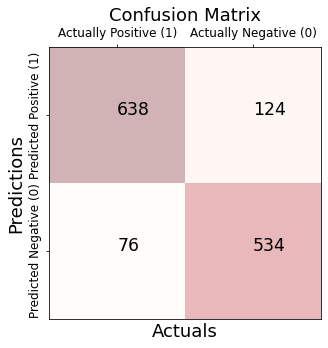

In [22]:
fig, ax = plt.subplots(figsize=(6, 5))
ax.matshow(conf_m, cmap=plt.cm.Reds, alpha=0.3)
for i in range(conf_m.shape[0]):
    for j in range(conf_m.shape[1]):
        ax.text(x=j, y=i,s=conf_m[i, j], size='xx-large')

x = [0,1]
y = [0,1]
labels = ['Actually Positive (1)', 'Actually Negative (0)']

plt.xticks(x, labels, rotation='360', fontsize = 12)
ylabels = ['Predicted Positive (1)', 'Predicted Negative (0)']
plt.yticks(y, ylabels, rotation='90', fontsize = 12, va = 'center')
plt.xlabel('Actuals', fontsize=18)
plt.ylabel('Predictions', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.tick_params(bottom = False)
plt.show()

### (e) Using the confusion matrix, compute: Recall, Precision, Accuracy, and F1-score.

#### The expressions in the return statements are Precision, Recall and Accuracy respectively.
#### True positives are the first row [0], first column values [0]
#### False positives are the first row [0], first column values [1]
#### False negatives are the first row [1], first column values [0]
#### True negatives are the first row [1], first column values [1]

In [23]:
def metrics(conf):
    tp = conf_m[0][0]
    fp = conf_m[0][1]
    fn = conf_m[1][0]
    tn = conf_m[1][1]
    return tp/(tp +fp),tp/(tp+fn), (tp+tn)/(tp+fp+fn+tn)

In [24]:
tp = conf_m[0][0] 
fp = conf_m[0][1] 
fn = conf_m[1][0] 
tn = conf_m[1][1]

In [39]:
print( 'Precision is', round(metrics(conf_m)[0],2),'.', 
      'Recall is', round(metrics(conf_m)[1],2),'.',
      'Accuracy is', round(metrics(conf_m)[2],2),'.' )

Precision is 0.84 . Recall is 0.89 . Accuracy is 0.85 .


In [35]:
precision = metrics(conf_m)[0]  ## The first number of the defined metrics function 
recall = metrics(conf_m)[1]  ## The second number of the defined metrics function

In [41]:
F1_Score = 2 * (precision * recall) / (precision + recall)
print ('F1_score is ', round(F1_Score,2))

F1_score is  0.86


# 4 Discussion and Conclusion

##### Accuracy

Accuracy is a way to find out how often the discriminant function or model is right. The closer to one the better 

##### How to Calculate
(True Positive + True Negative) / Total Predictions.

Having an accuracy of 0.85 means that 85 percent of the total prediction is right.

##### Precision

Precision shows how many of the predicted positives are actually positive.

##### How to Calculate

True Positive / (True Positive + False Positive).

Precision doesn't look at the negative cases that were correctly predicted.
Having a precision of 0.84 shows that out of 100 positives, 83 were correctly predicted as positive while the remaining 16 are false positives

##### Recall (Sensitivity)

Recall shows how many of the positive cases are predicted to be positive.
It measures how good the model is at predicting positives.

##### How to Calculate

True Positive / (True Positive + False Negative).

Having a value of 0.89 means that out of 100 positives, 89 are correctly predicted to be positive.

Sensitivity is effective at assessing the accuracy of a model's positive prediction.

##### F1-score

F1-score is the "harmonic mean" of precision and sensitivity (Alnazzawi et al.).
It takes both false positive and false negative cases into account and is useful for imbalanced datasets.

##### How to Calculate

2 * ((Precision * Sensitivity) / (Precision + Sensitivity)).

This score does not take into account the True Negative values:
The higher the precision and recall, the higher the F1-score. F1-score ranges between 0 and 1. The closer it is to 1, the better the model, therefore a f1 score of 0.86 is a good one

In conclusion, the average of 100% is 50 or 0.5, and these test values are above the average. This means that the model gotten from the discriminant function is a good model and can be used to figure out which bank notes are real or fake. However, the metrics scores all show that there is room for improvement as a more accurate line of discriminant function could be fit, which would lead to better predictions.





# References
1. Alnazzawi, Noha. “Building a Semantically Annotated Corpus for Chronic Disease 
Complications Using Two Document Types.” PLoS One, vol. 16, no. 3, 
Public Library of Science, Mar. 2021, p. e0247319.